In [ ]:
import os

In [ ]:
# move working dir up to parent, allows us to import from utils without too many shenanigans
os.chdir(os.pardir)

In [1]:
import matplotlib.pyplot as plt

In [2]:
from utils.data_initial import *
from utils.data_generated import *
from utils.data_processing import *

# Ethnicity data

In [3]:
df_cmu_char_md = load_cmu_character_metadata()

In [4]:
ethnicities = df_cmu_char_md.actor_ethnicity.dropna()

In [5]:
ethnicities_map = load_ethnicities()

In [6]:
ethnicities_dict = {key: val for key, val in zip(ethnicities_map.freebase_id, ethnicities_map.ethnicity)}

In [7]:
ethnicities_mapped = ethnicities.map(ethnicities_dict).dropna()

In [8]:
n_ethnicities = len(list(ethnicities.unique()))

print("There are {} different etnicities in our dataset.".format(n_ethnicities))

There are 479 different etnicities in our dataset.


In [9]:
mapped = ethnicities_map.dropna()

print("We managed to retrieve {} ethnicity values from freebase.".format(len(mapped)))

We managed to retrieve 430 ethnicity values from freebase.


In [10]:
n_actors = len(ethnicities)

print("There are {} actors with specified ethnicites in our dataset.".format(n_actors))

There are 106058 actors with specified ethnicites in our dataset.


In [11]:
ethnicities_vcount = pd.DataFrame(ethnicities_mapped.value_counts())
ethnicities_vcount.columns = ['occurences']

In [12]:
n_remaining = ethnicities_vcount.agg('sum').values[0]
print("We would loose {} ethnicites amongst them after mapping to their values.".format(n_actors - n_remaining))

We would loose 3161 ethnicites amongst them after mapping to their values.


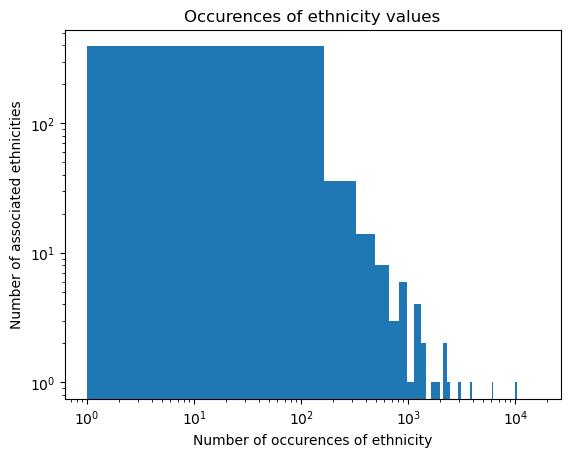

In [13]:
plt.hist(ethnicities.value_counts(), bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of ethnicity values")
plt.xlabel('Number of occurences of ethnicity')
plt.ylabel('Number of associated ethnicities')
plt.show()

Most of the ethnicities occur less than 100 times in our dataset.

In [14]:
ethnicities_vcount.describe()

,occurences
count,429.000000
mean,239.853147
std,1136.483955
min,1.000000
25%,6.000000
50%,23.000000
75%,109.000000
max,16351.000000


In [15]:
n_m10 = len(ethnicities_vcount[ethnicities_vcount.occurences > 10])
n_m100 = len(ethnicities_vcount[ethnicities_vcount.occurences > 100])
print("If we only keep those occuring more than 10 times we would have {} left, and for more than 100 times {} left.".format(n_m10, n_m100))

If we only keep those occuring more than 10 times we would have 286 left, and for more than 100 times 114 left.


The top 15 occuring ethnicities are:

In [16]:
ethnicities_vcount.head(15)

,occurences
Indians,16351
African Americans,10159
Jewish people,10121
English people,6165
Irish Americans,3857
Italian Americans,2956
white people,2307
white Americans,2250
Scottish American,2223
Irish people,1637


Ethnicities occuring at most 10 times are for example:

In [17]:
ethnicities_vcount[ethnicities_vcount.occurences < 10].sample(10)

,occurences
Serbs of Bosnia and Herzegovina,4
British Pakistanis,9
Sri Lankan Tamil diaspora,1
Bangladeshi American,1
Cheyennes,2
Filipino people of Spanish ancestry,7
Serbian Australian,4
Serbs in North Macedonia,8
Basque people,4
Arabs,5


Ethnicities occuring between 50 and 100 times are for exapmle:

In [18]:
ethnicities_vcount[(ethnicities_vcount.occurences < 100) & (ethnicities_vcount.occurences > 90)]

,occurences
Native Hawaiians,96
Irish Canadians,95
Pakistanis,94
Lebanese American,91


Here are some examples illustrating the granularity of the data:

In [19]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('Japan')]

,occurences
Japanese,649
Japanese American,278
Japanese Brazilians,3


In [20]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('Asia')]

,occurences
Asian Americans,224
Asian people,103
British Asian,7


In [21]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('Africa')]

,occurences
African Americans,10159
White Africans of European ancestry,45
history of the Jews in the African diaspora,33
South African American,24
African people,16
White South Africans,5
Greeks in South Africa,2
British African Caribbean people,1


We also notice that their might be some additionnal data cleaning to be done, for example:

In [22]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('history')]

,occurences
history of the Jews in the African diaspora,33
history of the Jews in India,28
